In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import joblib

In [31]:
# Step 1: Load the dataset


def load_data(filepath):
    """Load and initial preprocessing of air quality data"""
    df = pd.read_csv(filepath, dayfirst=True)
    df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')
    df.drop(columns=['Date', 'Time'], inplace=True)
    df.set_index('DateTime', inplace=True)
    return df


filepath = r"C:\Users\OM\Downloads\AirQuality_Cleaned (2).csv"


 
df_raw = load_data(filepath)
transformed_df = transform_data(df_raw)
transformed_df.head()

    

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour,day_of_week,month
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,"2,6",1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",18.0,2.0,3.0
2004-03-10 19:00:00,2,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",19.0,2.0,3.0
2004-03-10 20:00:00,"2,2",1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",20.0,2.0,3.0
2004-03-10 21:00:00,"2,2",1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",21.0,2.0,3.0
2004-03-10 22:00:00,"1,6",1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",22.0,2.0,3.0


In [28]:


def clean_data(df):
    """Data cleaning pipeline"""
    # Replace -200 with NaN
    df.replace(-200, np.nan, inplace=True)

    # Convert object columns with commas to floats
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].str.replace(',', '.').astype(float)

    # Impute missing values with median
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)

    # Remove duplicate datetime entries
    df_clean = df_imputed[~df_imputed.index.duplicated(keep='first')]

    return df_clean, imputer

# Example usage:
clean_df, imputer = clean_data(df_raw)
clean_df.head()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [34]:
def transform_data(df):
    """Feature engineering and transformation"""

    # Ensure the index is datetime just in case
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, errors='coerce')

    # Create time-based features
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    # Drop less useful or high-missingness columns
    if 'NMHC(GT)' in df.columns:
        df = df.drop(['NMHC(GT)'], axis=1)

    return df

# # Example usage:
transformed_df = transform_data(clean_df)
transformed_df.head()





,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour,day_of_week,month
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18.0,2.0,3.0
2004-03-10 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19.0,2.0,3.0
2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20.0,2.0,3.0
2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21.0,2.0,3.0
2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22.0,2.0,3.0


In [33]:
print(type(clean_df.index))  # Should be DatetimeIndex


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [35]:
def correct_errors(df):
    """Handle outliers and data errors"""
    # Clip negative values to zero
    non_negative_cols = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']
    for col in non_negative_cols:
        df[col] = df[col].clip(lower=0)

    # Remove outliers using IQR method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    df = df[mask]

    return df
corrected_df = correct_errors(transformed_df)
corrected_df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour,day_of_week,month
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18.0,2.0,3.0
2004-03-10 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19.0,2.0,3.0
2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20.0,2.0,3.0
2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21.0,2.0,3.0
2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22.0,2.0,3.0


In [48]:
def build_model(df, target_col='CO(GT)'):
    """Build and evaluate prediction model"""
    # Prepare data
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Model training
    model = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train_scaled, y_train)
    
    # Model evaluation
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    
    return model, scaler

# ✅ Call the function here, after defining it
model, scaler = build_model(corrected_df)

# Now inspect the scaler
print("Scaler mean:", scaler.mean_)
print("Scaler scale (std dev):", scaler.scale_)


Model Performance:
RMSE: 0.47
R² Score: 0.83
Scaler mean: [1.06611122e+03 8.82417031e+00 9.02546544e+02 1.88074794e+02
 8.45388538e+02 1.05581998e+02 1.43396552e+03 9.58866116e+02
 1.90430630e+01 4.81612757e+01 1.04461630e+00 1.14648640e+01
 3.11415155e+00 6.31525259e+00]
Scaler scale (std dev): [174.79121642   5.5969111  218.25466634 110.99454986 197.5095039
  33.94515741 319.68053597 315.4824917    8.98661016  17.36123427
   0.40674687   7.00670912   2.04033657   3.27128352]


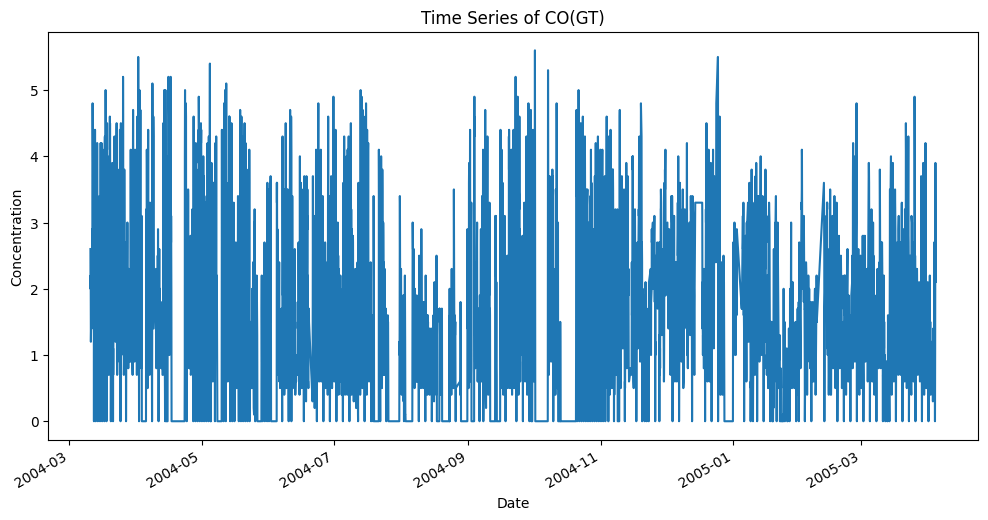

In [50]:


def plot_time_series(df, column='CO(GT)'):
    """Plot time series of target variable"""
    plt.figure(figsize=(12, 6))
    df[column].plot()
    plt.title(f'Time Series of {column}')
    plt.ylabel('Concentration')
    plt.xlabel('Date')
    plt.show()

# Assuming df_transformed is your cleaned and transformed DataFrame
plot_time_series(corrected_df)  # This plots 'CO(GT)' by default



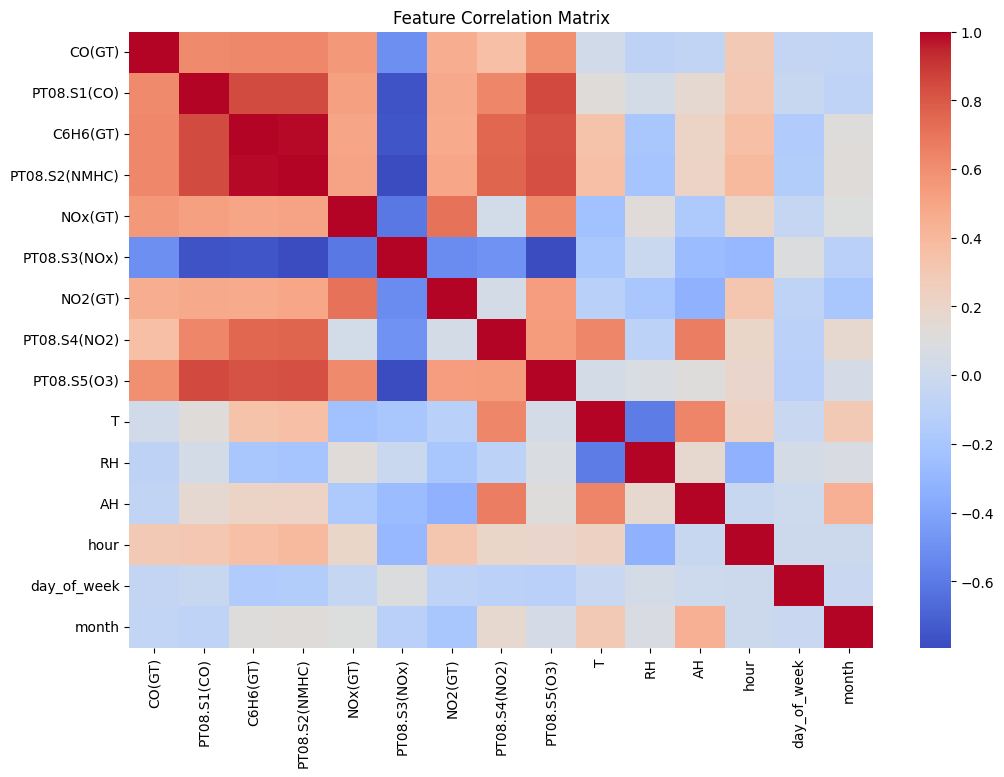

In [53]:
def plot_correlations(df):
    """Plot feature correlation matrix"""
    plt.figure(figsize=(12, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title('Feature Correlation Matrix')
    plt.show()
plot_correlations(corrected_df)
    
    